In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/delaney-processed.csv")
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


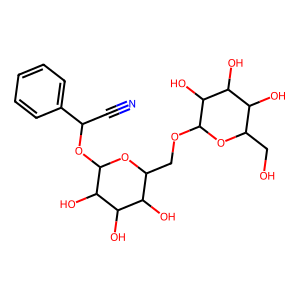

In [4]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
smiles = df.loc[0, "smiles"]
mol = Chem.MolFromSmiles(smiles)
Draw.MolToImage(mol)

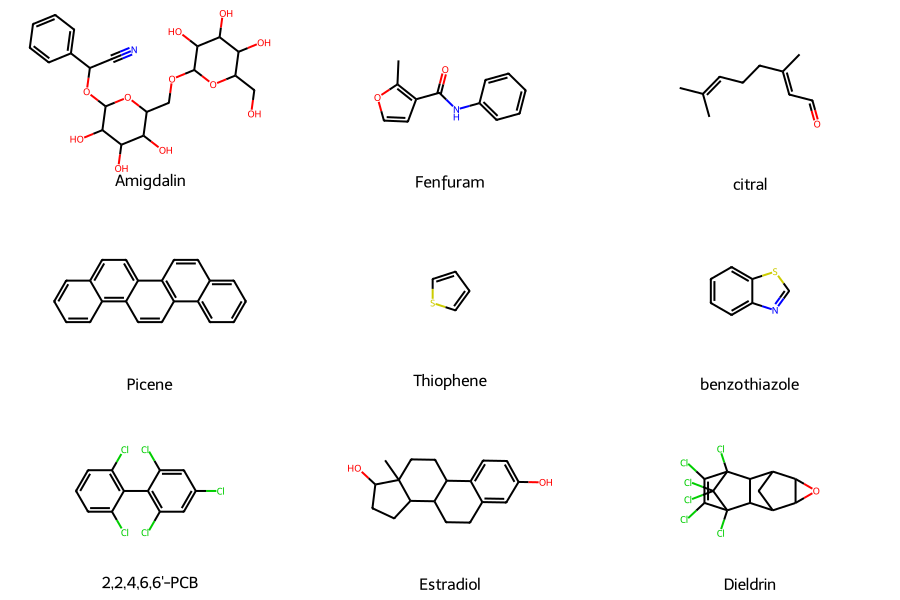

In [25]:
smiles = df.loc[:8, "smiles"]
names = df.loc[:8, "Compound ID"].values.tolist()
mols = []
for smi in smiles:
    mol = Chem.MolFromSmiles(smi)
    mols.append(mol)
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(300,200), legends=names)

In [26]:
df.describe()

,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre
count,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000,1128.000000
mean,-2.988192,1.058511,203.937074,0.701241,1.390957,2.177305,34.872881,-3.050102
std,1.683220,0.238560,102.738077,1.089727,1.318286,2.640974,35.383593,2.096441
min,-9.702000,0.000000,16.043000,0.000000,0.000000,0.000000,0.000000,-11.600000
25%,-3.948250,1.000000,121.183000,0.000000,0.000000,0.000000,0.000000,-4.317500
50%,-2.870000,1.000000,182.179000,0.000000,1.000000,1.000000,26.300000,-2.860000
75%,-1.843750,1.000000,270.372000,1.000000,2.000000,3.000000,55.440000,-1.600000
max,1.091000,2.000000,780.949000,11.000000,8.000000,23.000000,268.680000,1.580000


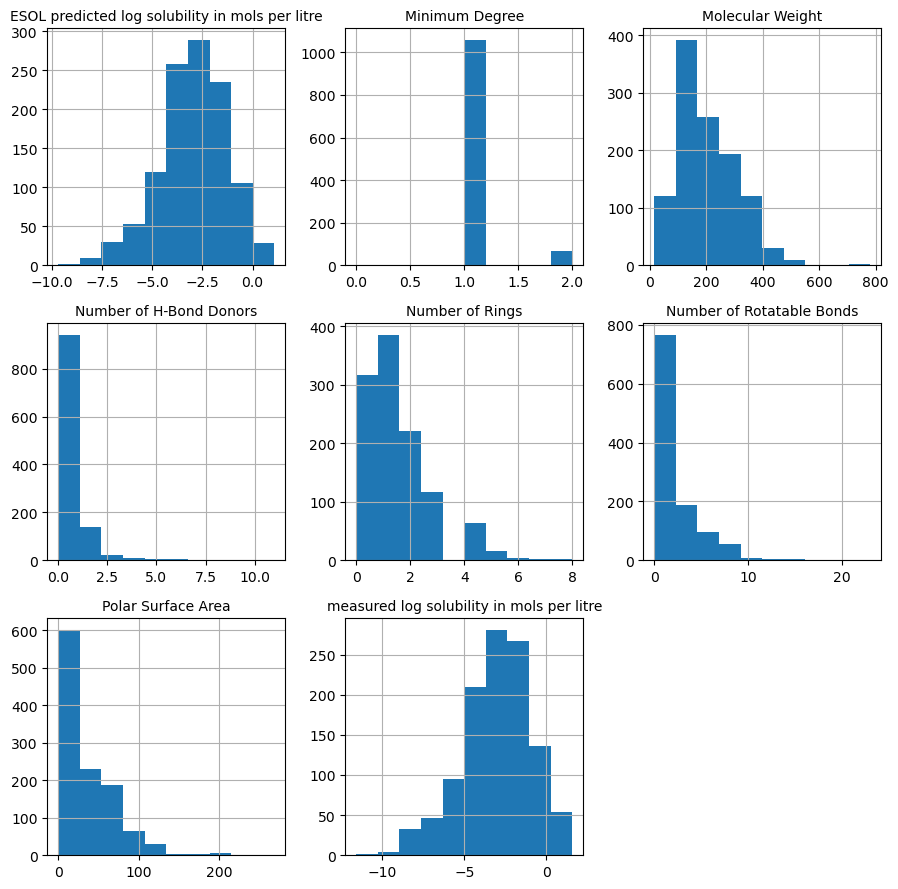

In [41]:
fig = plt.figure(figsize=(9, 9))
is_number_df = df[df.describe().columns]
for i, col in enumerate(is_number_df.columns):
    ax = fig.add_subplot(3, 3, i+1)
    ax.hist(is_number_df[col])
    ax.set_title(col, fontsize=10)
    ax.grid()
plt.tight_layout()

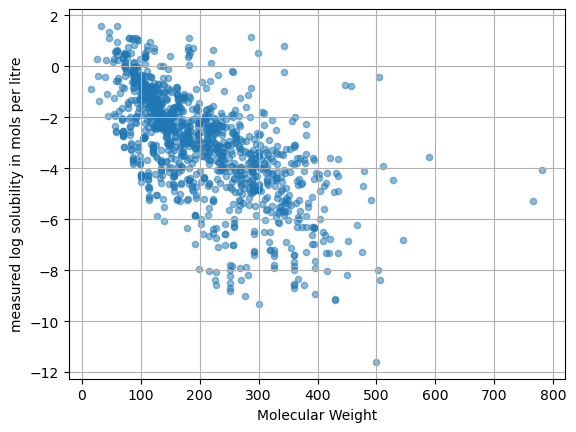

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df["Molecular Weight"], df["measured log solubility in mols per litre"], alpha=0.5, s=20)
ax.set_xlabel("Molecular Weight")
ax.set_ylabel("measured log solubility in mols per litre")
ax.grid(True)